Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión. Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.



In [1]:
import pandas as pd

# URL
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar los datos como dataframe
df = pd.read_json(url)

# Ver las primeras filas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.



In [2]:
# Normalizar las columnas anidadas
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Unir todo en un solo DataFrame
df_final = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

# Visualizar las primeras filas del DataFrame final
df_final.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
# Ver tipos de datos
df_final.info()

# Ver los tipos de datos específicos
df_final.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [4]:
# Ver resumen estadístico de columnas numéricas
df_final.describe()

# Ver valores únicos por columna categórica
df_final.select_dtypes(include='object').nunique()


,0
customerID,7267
Churn,3
gender,2
Partner,2
Dependents,2
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [5]:
# Contar valores nulos por columna
df_final.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [6]:
# Ver si hay filas duplicadas
df_final.duplicated().sum()


np.int64(0)

In [7]:
# Ver valores únicos por cada columna categórica
for col in df_final.select_dtypes(include='object'):
    print(f"{col}: {df_final[col].unique()}\n")


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn: ['No' 'Yes' '']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['Yes' 'No']

PhoneService: ['Yes' 'No']

MultipleLines: ['No' 'Yes' 'No phone service']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['Yes' 'No' 'No internet service']

StreamingTV: ['Yes' 'No' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['One year' 'Month-to-month' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']



In [8]:
# Reemplazar 'No internet service' por 'No' en columnas relacionadas con servicios de internet
cols_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_internet:
    df_final[col] = df_final[col].replace({'No internet service': 'No'})

# Reemplazar 'No phone service' por 'No' en la columna MultipleLines
df_final['MultipleLines'] = df_final['MultipleLines'].replace({'No phone service': 'No'})
df_final.select_dtypes(include='object').nunique()


,0
customerID,7267
Churn,3
gender,2
Partner,2
Dependents,2
PhoneService,2
MultipleLines,2
InternetService,3
OnlineSecurity,2
OnlineBackup,2


In [9]:
# Ver valores únicos por cada columna categórica
for col in df_final.select_dtypes(include='object'):
    print(f"{col}: {df_final[col].unique()}\n")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn: ['No' 'Yes' '']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['Yes' 'No']

PhoneService: ['Yes' 'No']

MultipleLines: ['No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes']

OnlineBackup: ['Yes' 'No']

DeviceProtection: ['No' 'Yes']

TechSupport: ['Yes' 'No']

StreamingTV: ['Yes' 'No']

StreamingMovies: ['No' 'Yes']

Contract: ['One year' 'Month-to-month' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']



In [10]:
(df_final['Churn'] == '').sum()


np.int64(224)

In [11]:
#  Eliminar las filas con valor vacío en Churn
df_final = df_final[df_final['Churn'] != '']

# Confirmar cantidad de filas después de la limpieza
print("Cantidad de filas después de eliminar vacíos en Churn:", df_final.shape[0])

# Verificar los valores únicos en la columna Churn
print("Valores únicos en Churn:", df_final['Churn'].unique())


Cantidad de filas después de eliminar vacíos en Churn: 7043
Valores únicos en Churn: ['No' 'Yes']


In [13]:
# Crear la columna 'Cuentas_Diarias' dividiendo el cargo mensual entre 30 días
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30

# Visualizar las primeras filas para confirmar
df_final[['Charges.Monthly', 'Cuentas_Diarias']].head(20)


,Charges.Monthly,Cuentas_Diarias
0,65.60,2.186667
1,59.90,1.996667
2,73.90,2.463333
3,98.00,3.266667
4,83.90,2.796667
5,69.40,2.313333
6,109.70,3.656667
7,84.65,2.821667
8,48.20,1.606667
9,90.45,3.015000


Opcional

Analisis descriptivo

In [14]:
# Análisis descriptivo incluyendo todas las columnas
df_final.describe(include='all')


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043.000000
unique,7043,2,2,NaN,2,2,NaN,2,2,3,...,2,2,2,2,3,2,4,NaN,6531,NaN
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,NaN
freq,1,5174,3555,NaN,3641,4933,NaN,6361,4072,3096,...,4621,4999,4336,4311,3875,4171,2365,NaN,11,NaN
mean,NaN,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,2.158723
std,NaN,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,1.003002
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,0.608333
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,1.183333
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,2.345000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,2.995000


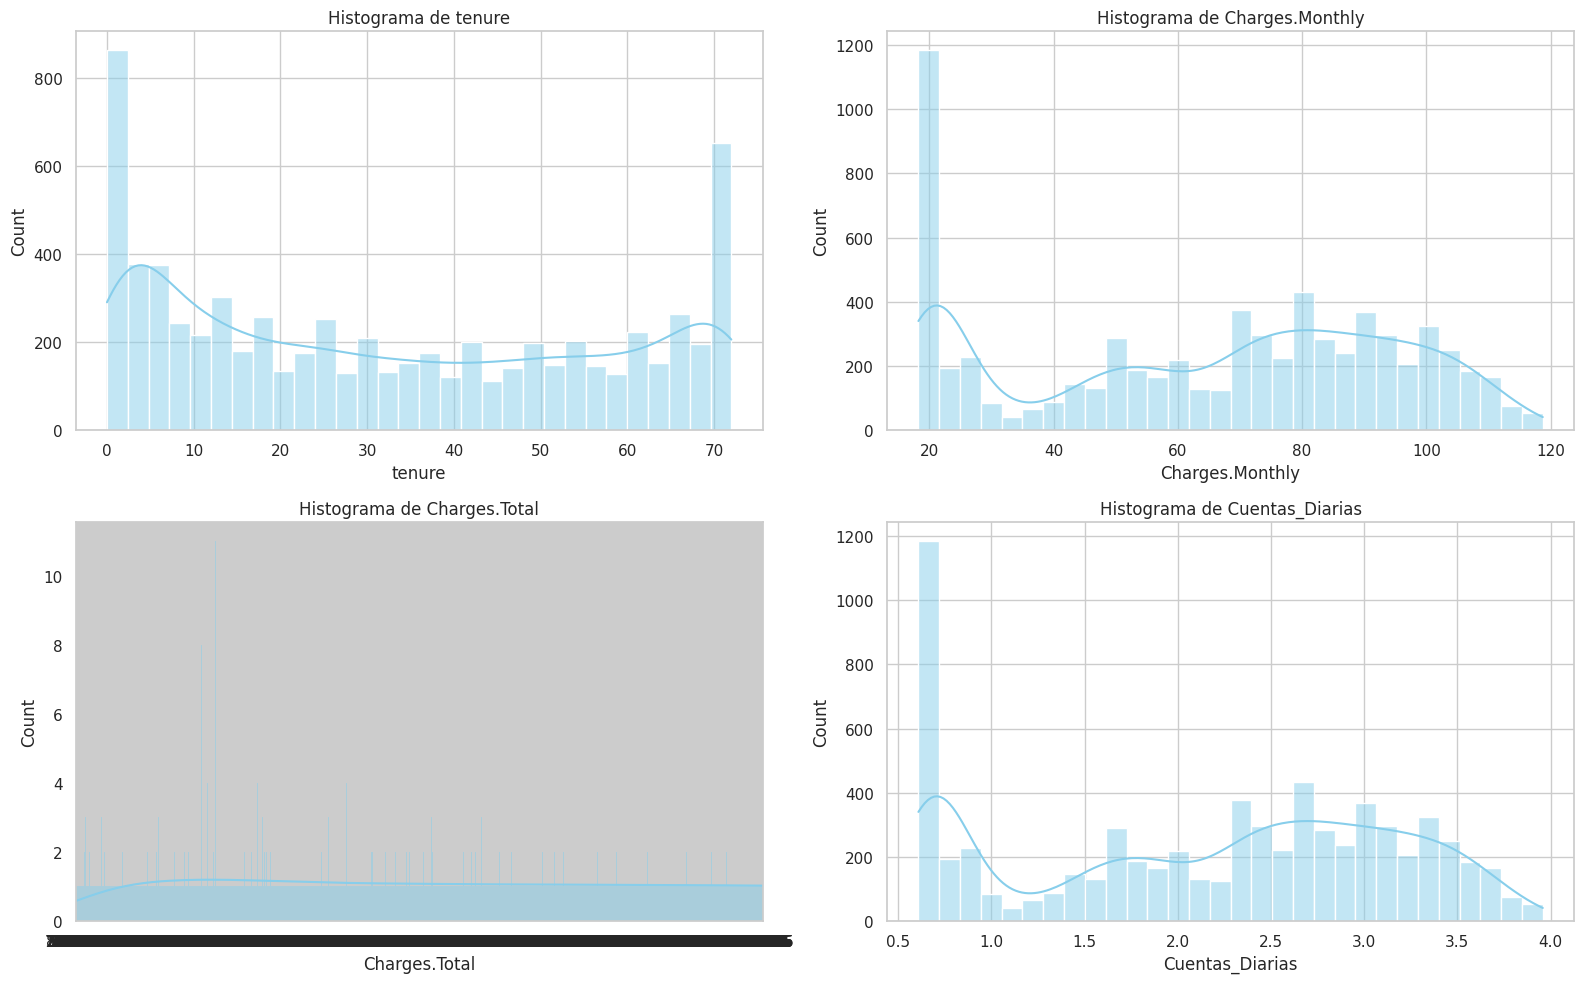

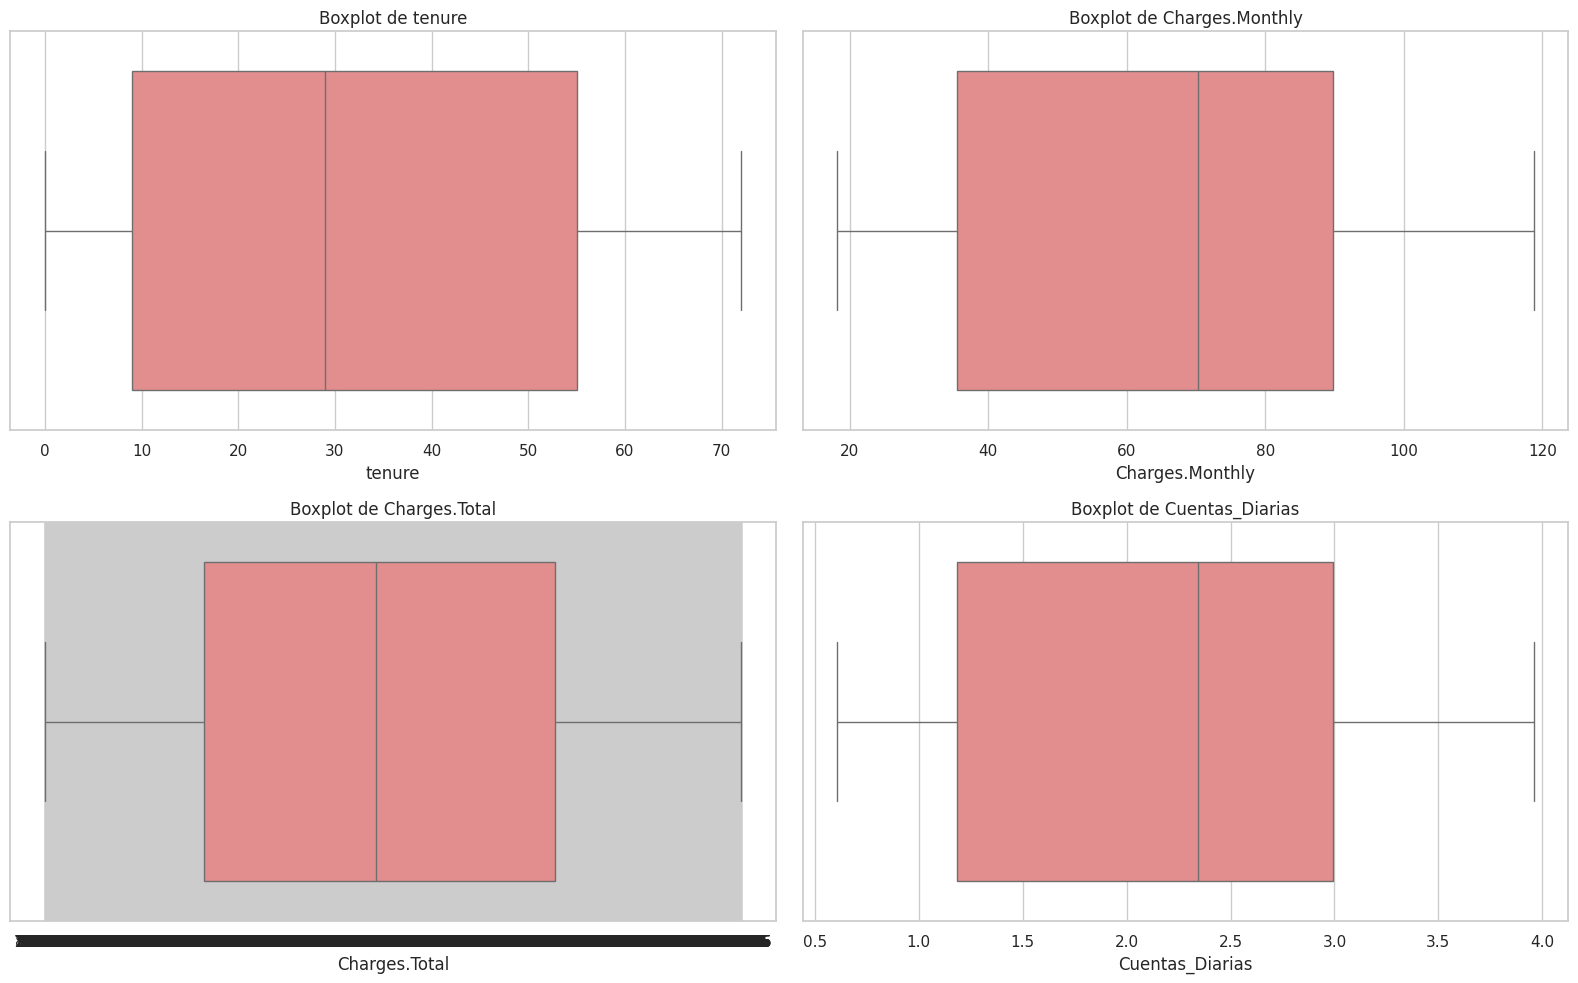

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Lista de variables numéricas
numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

# Graficar histogramas
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df_final, x=col, kde=True, bins=30, color='skyblue')
    plt.title(f'Histograma de {col}')

    # Ajustar solo el histograma de Charges.Total
    if col == 'Charges.Total':
        plt.xlim(0, 5000)

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df_final, x=col, color='lightcoral')
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()



1. tenure (meses como cliente)
  Distribución bimodal: muchos clientes están en el primer mes y otro grupo cerca del mes 72.

  Esto puede indicar nuevos clientes y clientes muy fieles.

2. Charges.Monthly (costo mensual)
Distribución amplia, con algunos picos visibles.

  Hay grupos de clientes en diferentes rangos de precio, posiblemente según los servicios contratados.

3. Charges.Total
El gráfico está aplastado por valores extremos (outliers).

  Requiere que limitemos el eje o apliquemos logaritmo para entender la distribución real.

4. Cuentas_Diarias
  Similar al mensual, pero con valores reducidos.

  La forma de la distribución es consistente: muchos clientes pagan entre 1.5 y 3 USD por





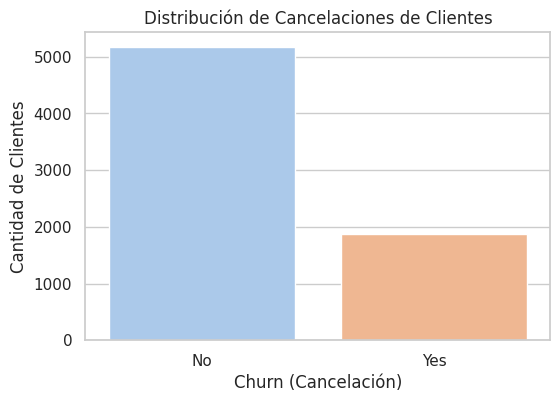

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar distribución de clientes por estado de Churn
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

sns.countplot(data=df_final, x='Churn', hue='Churn', palette='pastel', legend=False)

plt.title('Distribución de Cancelaciones de Clientes')
plt.xlabel('Churn (Cancelación)')
plt.ylabel('Cantidad de Clientes')
plt.show()



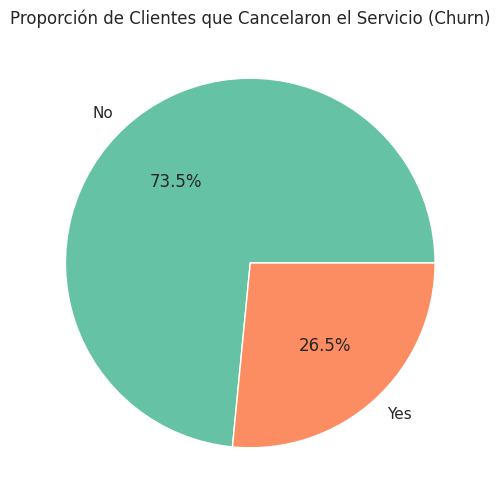

In [21]:
# Gráfico de pastel
plt.figure(figsize=(6, 6))
df_final['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
plt.title('Proporción de Clientes que Cancelaron el Servicio (Churn)')
plt.ylabel('')
plt.show()


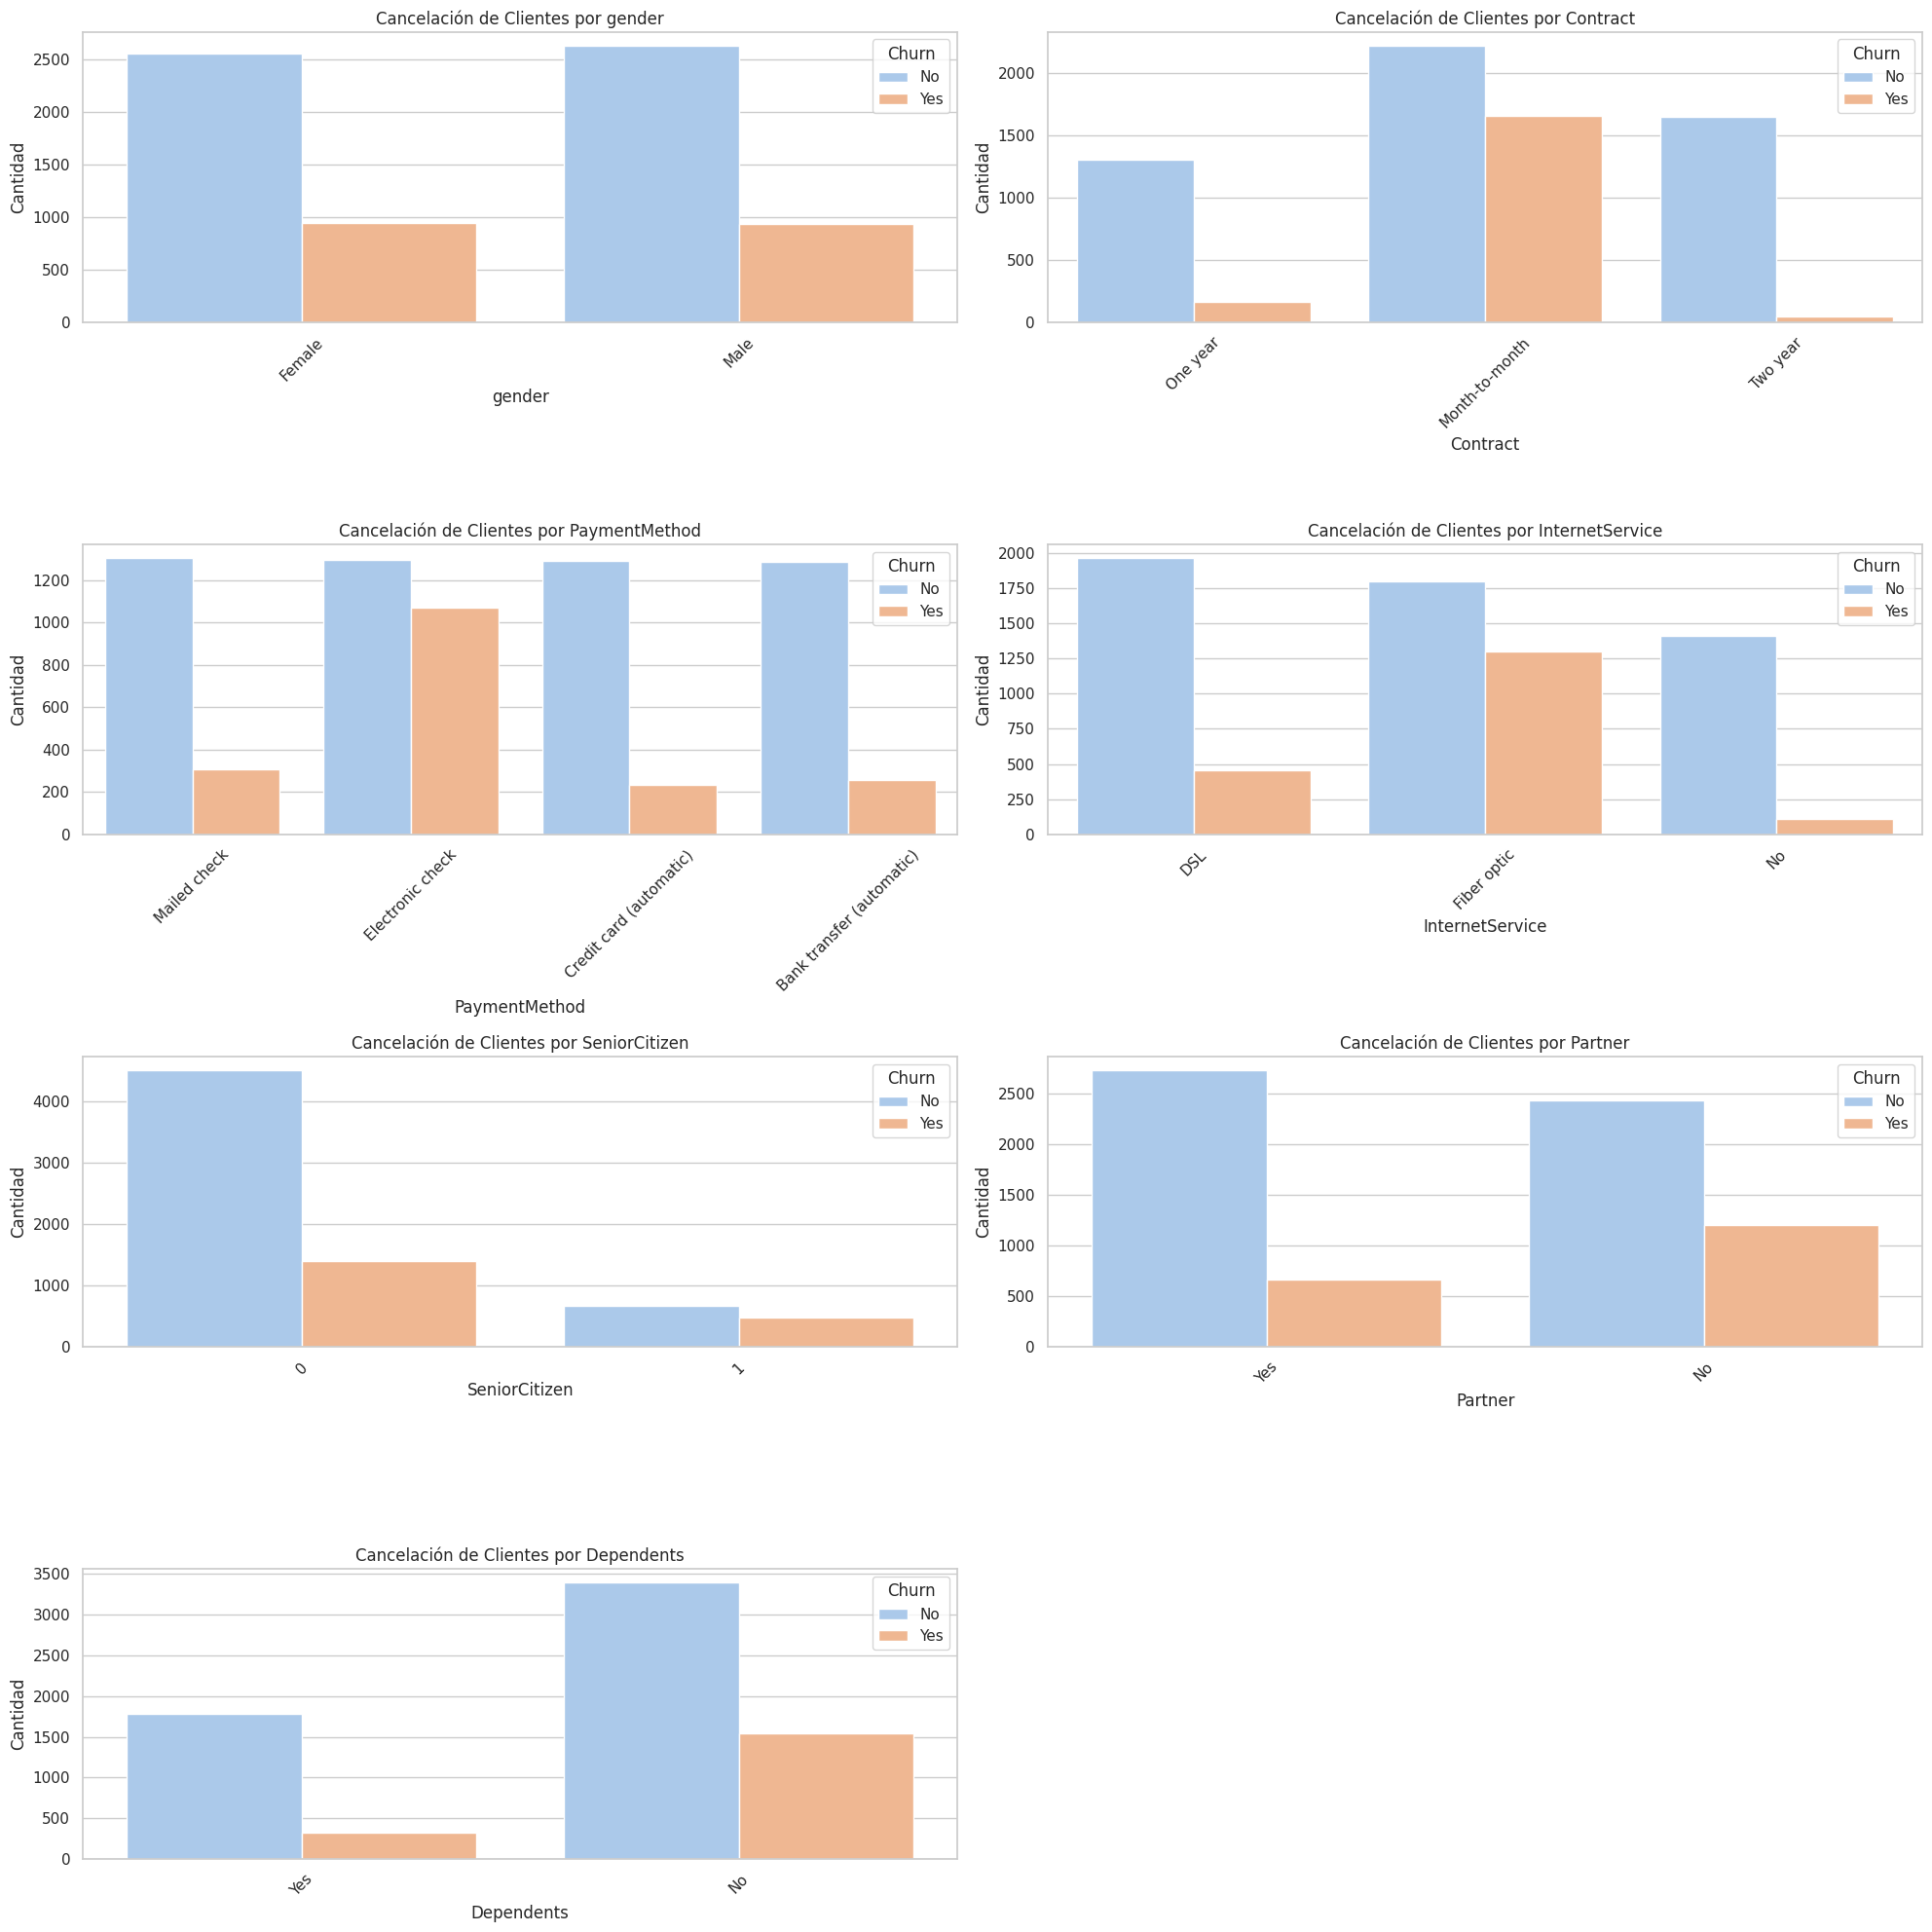

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables categóricas que queremos analizar
cat_vars = ['gender', 'Contract', 'PaymentMethod', 'InternetService', 'SeniorCitizen', 'Partner', 'Dependents']

# Configuración de estilo
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))

# Crear un gráfico por variable
for i, col in enumerate(cat_vars):
    plt.subplot(4, 2, i+1)
    sns.countplot(data=df_final, x=col, hue='Churn', palette='pastel')
    plt.title(f'Cancelación de Clientes por {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Clientes con "Electronic Check" tienen mayor cancelación (Churn = Yes).

Los que no tienen Internet Service casi no cancelan

Clientes sin pareja ni dependientes tienden más a cancelar.

Senior Citizens muestran una proporción mayor de cancelación que los no seniors.

Esto sugiere que tener dependientes podría estar asociado a una mayor permanencia en el servicio.



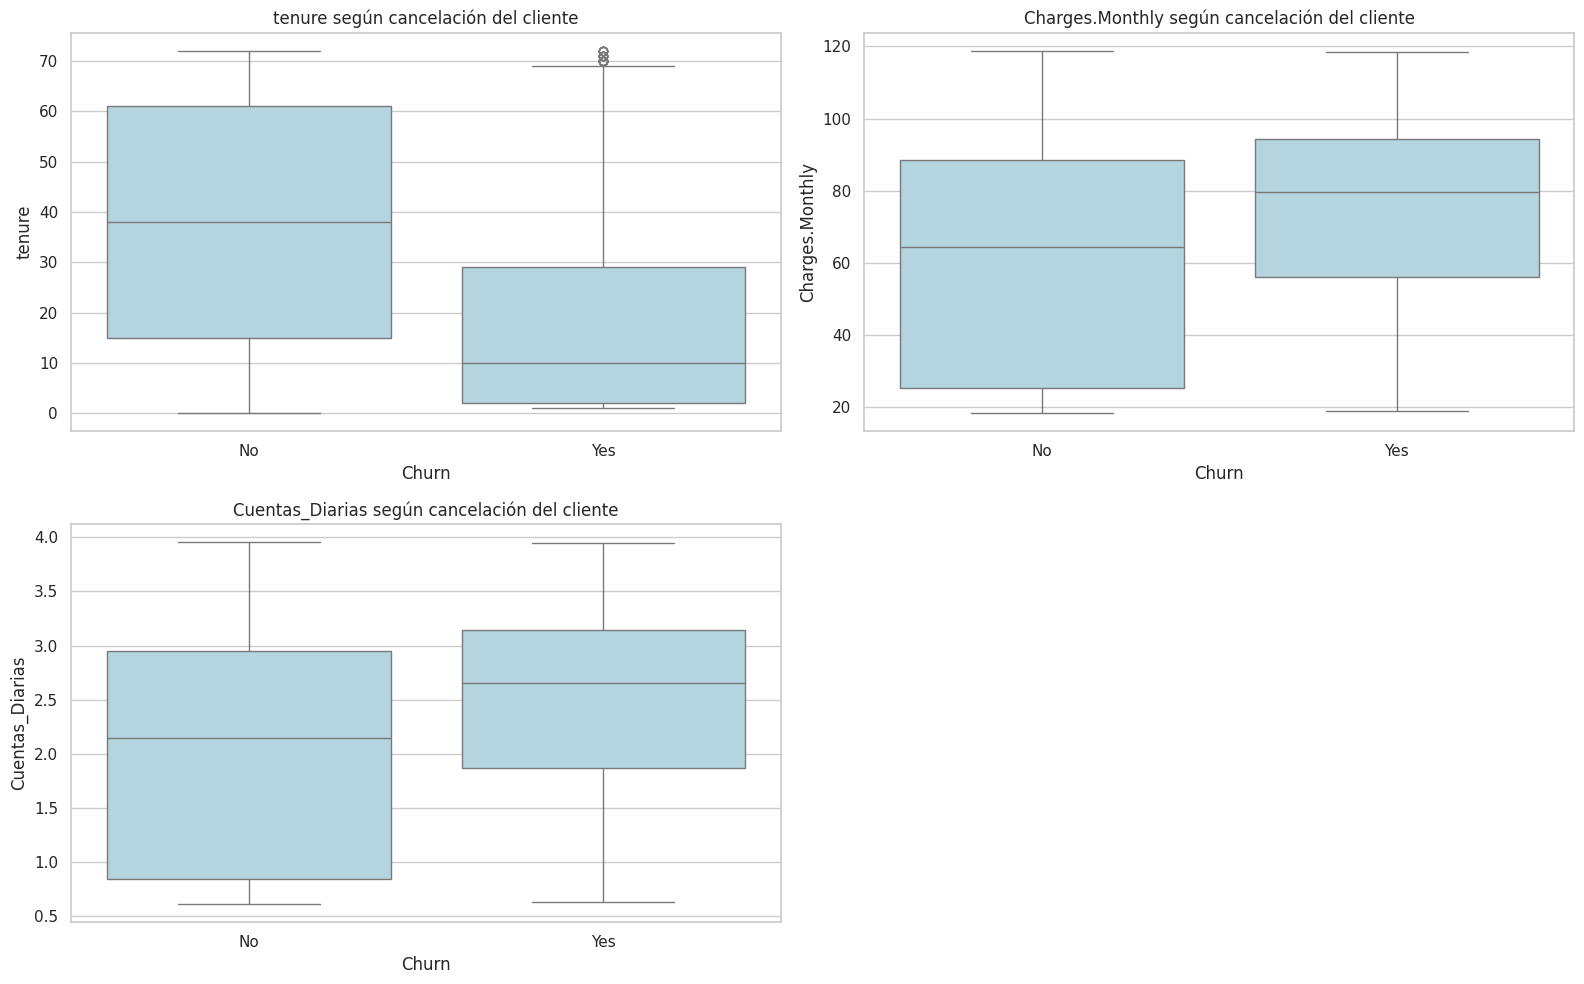

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Variables numéricas a graficar
numeric_cols = ['tenure', 'Charges.Monthly', 'Cuentas_Diarias']

# Graficar boxplots sin 'Charges.Total' para evitar lentitud
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df_final, x='Churn', y=col, color='lightblue')  # sin palette, sin hue
    plt.title(f'{col} según cancelación del cliente')

plt.tight_layout()
plt.show()




Clientes que cancelaron (Yes) tienden a haber estado menos tiempo.

Clientes que permanecen (No) tienen mayor variabilidad y media.

Charges.Monthly (factura mensual):

Quienes cancelan tienden a tener un valor mensual ligeramente más alto que quienes no.

La mediana es claramente más alta.

Cuentas_Diarias:

Misma tendencia que Charges.Monthly. Quienes cancelan pagan más por día.

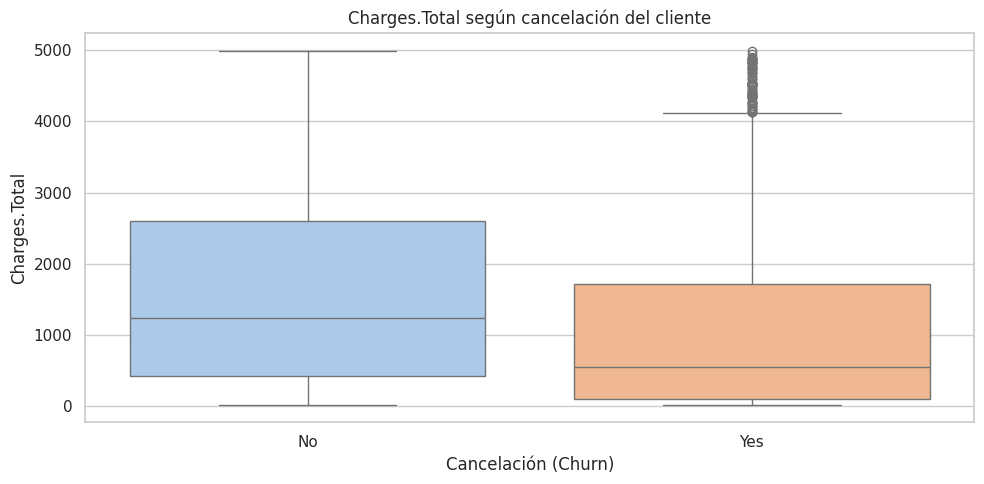

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Limpiar caracteres no numéricos (como espacios o comas) si los hubiera
df_final['Charges.Total'] = df_final['Charges.Total'].replace(" ", "", regex=True)
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

# 🔹 Eliminar valores atípicos extremos solo para visualización (ej. > 5000)
df_filtered = df_final[df_final['Charges.Total'] <= 5000]

# 🔹 Gráfico boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_filtered, x='Churn', y='Charges.Total', hue='Churn', palette='pastel', legend=False)
plt.title('Charges.Total según cancelación del cliente')
plt.xlabel('Cancelación (Churn)')
plt.ylabel('Charges.Total')
plt.tight_layout()
plt.show()



Clientes que NO cancelaron (Churn = No): tienden a tener un gasto total acumulado mayor

Clientes que SÍ cancelaron (Churn = Yes): presentan un gasto acumulado más bajo, indicando que se fueron tras poco tiempo

**Este análisis refuerza la idea de que la permanencia está directamente asociada con el total facturado, y por lo tanto, el churn se concentra en usuarios de bajo lifetime value.**

# Informe Final – Análisis de Cancelación de Clientes  – Telecom X

---

## Introducción

Telecom X enfrenta un alto índice de **cancelación de clientes (Churn)**, lo cual impacta directamente en los ingresos y la retención a largo plazo. Este análisis tiene como objetivo **explorar y comprender los factores que influyen en la cancelación**, utilizando técnicas de análisis exploratorio de datos con Python, Pandas, Seaborn y Matplotlib.

---

## Limpieza y Tratamiento de Datos

Se realizó la importación de datos desde un archivo `.json` alojado en GitHub. El archivo contenía columnas anidadas (como `customer`, `phone`, `internet`, `account`) que fueron **normalizadas y combinadas** en un único DataFrame (`df_final`).

Pasos destacados:

- Se detectaron y eliminaron **224 filas vacías** en la variable `Churn`.
- Se corrigieron categorías como `"No internet service"` → `"No"` en varias columnas.
- Se creó la columna **`Cuentas_Diarias`** dividiendo `Charges.Monthly` entre 30.
- Se verificó la ausencia de **valores nulos** y **filas duplicadas**.

---

## Análisis Exploratorio de Datos

### Estadísticas Generales

- **tenure**: Promedio 32.3 meses (clientes cancelados tienen menos tiempo).
- **Charges.Monthly**: Ligeramente más alto en clientes que cancelan.
- **Charges.Total**: Significativamente mayor en quienes NO cancelan.
- **Cuentas_Diarias**: Clientes con `Churn = Yes` tienen pagos diarios más altos en promedio.

###  Visualizaciones

#### ➤ Variables numéricas
- Clientes que cancelan tienen:
  - Menor `tenure`
  - Menor `Charges.Total`
  - Mayor `Charges.Monthly` y `Cuentas_Diarias`

#### ➤ Variables categóricas
- Mayor cancelación en clientes con:
  - **Método de pago**: `Electronic Check`
  - **InternetService**: `Fiber optic`


---

##  Conclusiones

- **Tenencia corta (`tenure`) y bajo gasto acumulado (`Charges.Total`) son claros predictores de cancelación.**
- **Clientes con **pagos mensuales altos** y **contratos poco comprometidos** tienen mayor probabilidad de irse.**
- **El **método de pago** y la **presencia de servicios adicionales** también influyen en la decisión de cancelar.**

---

##  Recomendaciones

- **Incentivar contratos a largo plazo**
- **Agregar servicios adicionales (seguridad, backup, soporte)** como paquetes promocionales para aumentar retención.
- **Segmentar clientes con bajo tenure y alto costo mensual** para campañas proactivas de retención.
- **Educar a nuevos clientes** sobre los beneficios de la permanencia y los servicios adicionales.

---

Es importante la implementación de estrategias de fidelización basadas en datos.


**OPCIONAL**

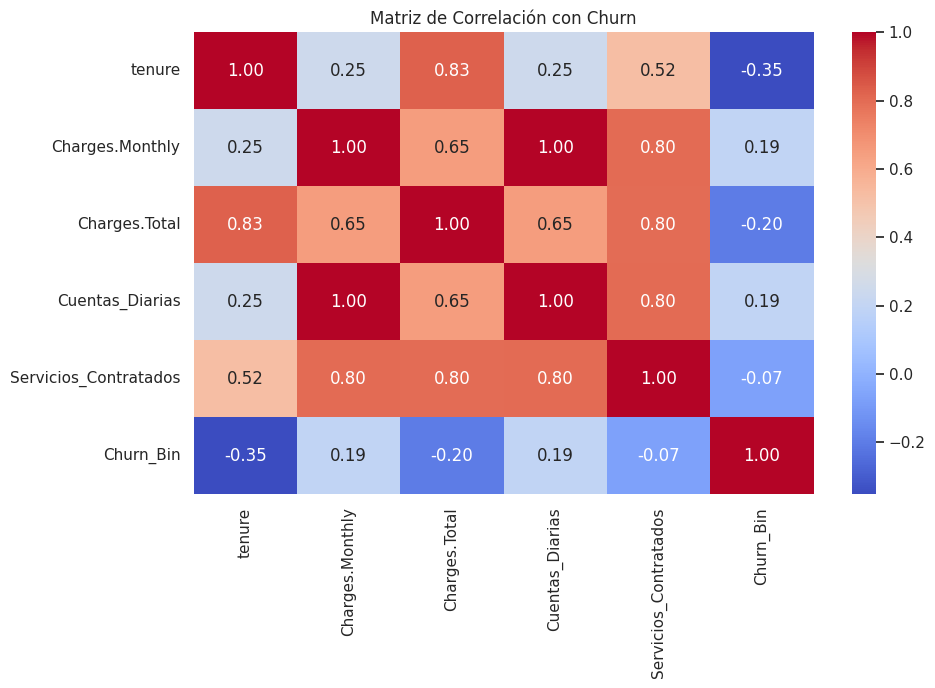

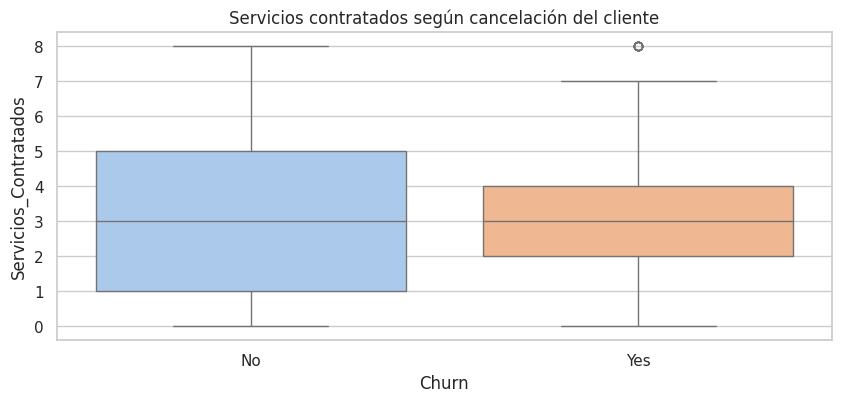

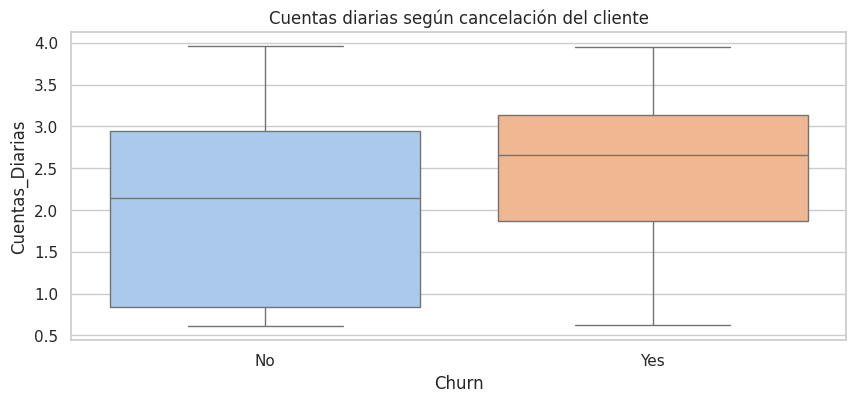

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Copiar el dataframe para no modificar el original
df_corr = df_final.copy()

# Convertir Churn a valores binarios
df_corr['Churn_Bin'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# Crear columna de cantidad de servicios contratados
servicios = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
df_corr['Servicios_Contratados'] = df_corr[servicios].apply(lambda x: sum(x == 'Yes'), axis=1)

# Calcular matriz de correlación
corr = df_corr[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Servicios_Contratados', 'Churn_Bin']].corr()

# Mostrar matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación con Churn")
plt.show()

# Boxplot: Servicios contratados según churn
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_corr, x='Churn', y='Servicios_Contratados', hue='Churn', palette='pastel', legend=False)
plt.title("Servicios contratados según cancelación del cliente")
plt.show()

# Boxplot: Cuentas diarias según churn
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_corr, x='Churn', y='Cuentas_Diarias', hue='Churn', palette='pastel', legend=False)
plt.title("Cuentas diarias según cancelación del cliente")
plt.show()



tenure y Churn_Bin: Correlación negativa fuerte (−0.35).
→ Clientes con menor tiempo de permanencia tienen mayor probabilidad de cancelar.

Charges.Monthly y Churn_Bin: Correlación positiva leve (+0.19).
→ Cuotas mensuales más altas están asociadas ligeramente con mayor cancelación.

Servicios_Contratados y Churn_Bin: Casi sin correlación (−0.07).
→ La cantidad de servicios contratados no influye significativamente por sí sola en la cancelación.

Charges.Total y Churn_Bin: Correlación negativa moderada (−0.20).
→ Clientes con mayor gasto total tienen menor tendencia a cancelar (posiblemente por mayor fidelización).

Los clientes que cancelan tienden a tener menor tiempo de permanencia (tenure) y menor gasto total (Charges.Total). Aunque pagan montos mensuales ligeramente más altos, no necesariamente contratan más servicios. Esto sugiere que la fidelización a largo plazo y el valor acumulado del cliente son factores clave para reducir la cancelación.

Ofrecer más beneficios o servicios útiles a los clientes con baja permanencia.
1. Crear incentivos para contratos de largo plazo (descuentos progresivos, recompensas por permanencia).
2. Mejorar la experiencia del cliente, especialmente en los primeros meses, que es cuando más cancelan.

En resumen: una estrategia de fidelización basada en valor, no solo en precio.